In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pylops
from scipy import linalg as la
from scipy import sparse
from trips.io import build_x_true
from trips.operators import gaussian_blur_operator, first_derivative_operator
from trips.solvers.gks import GKSClass

### construct a true image

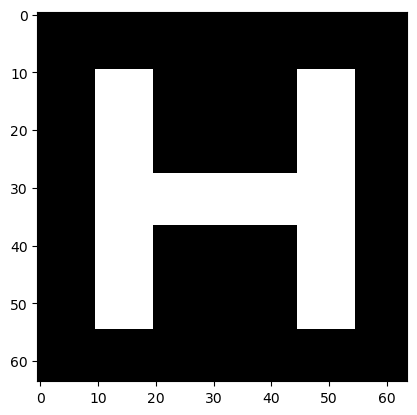

In [2]:
x_true = build_x_true().reshape(-1,1)

plt.imshow(x_true.reshape(64,64), cmap='Greys_r')

### apply an operator

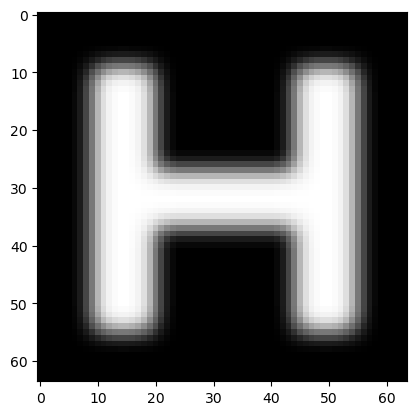

In [3]:
blur_operator = gaussian_blur_operator([9,9],2,64,64)

b_true = blur_operator @ x_true

plt.imshow( b_true.reshape(64,64), cmap='Greys_r')

### contaminate with noise

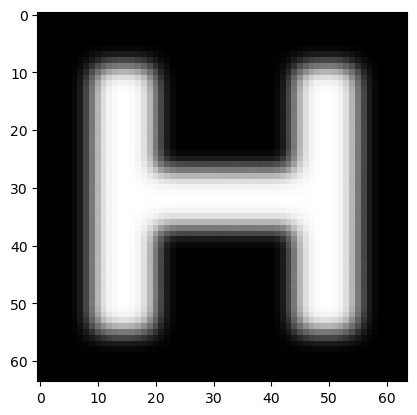

In [4]:
noise_level = 0.001
noise = np.random.randn(64*64)
e = noise_level * np.linalg.norm(b_true) / np.linalg.norm(noise) * noise
e = e.reshape(-1,1)
b = b_true + e
plt.imshow( b.reshape(64,64), cmap='Greys_r')

### construct regularization operators

In [5]:
I = pylops.Identity(4096) # identity operator
D = first_derivative_operator(n=4096) # first derivative operator
D2 = D @ D # second derivative operator

### run GKS with GCV

In [30]:
max_iters = 200
solver = GKSClass(projection_dim=3, regparam='gcv', dp_stop=False, tol=10**(-16))
solver.run(blur_operator, b, D, iter = max_iters, x_true=x_true)

running GKS...: 100%|██████████| 200/200 [02:22<00:00,  1.40it/s]


array([[-0.00670934],
       [-0.00869558],
       [-0.00481176],
       ...,
       [ 0.01890237],
       [-0.05369866],
       [ 0.03269433]])

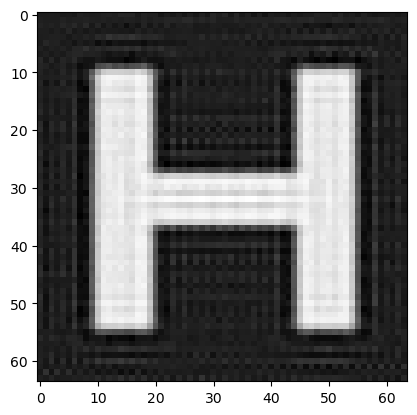

In [31]:
plt.imshow(solver.x.reshape(64,64), cmap='Greys_r')

### Convergence

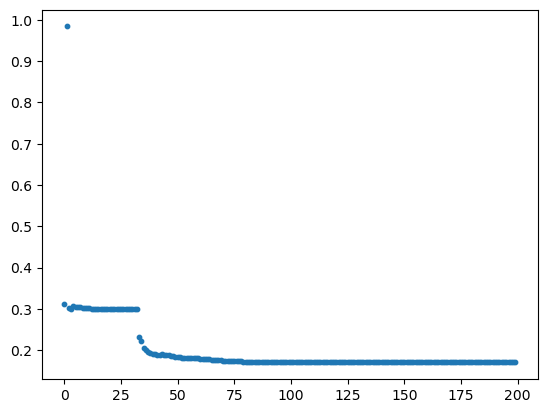

In [32]:
plt.scatter(range(len(solver.rre_history)), solver.rre_history, s=10)

### history of solutions

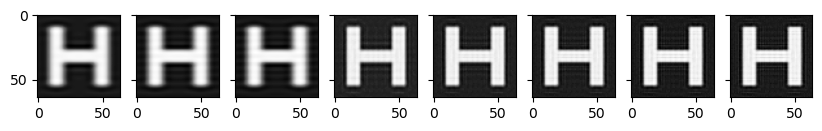

In [33]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(solver.x_history[9+10*ii].reshape(64,64), cmap='Greys_r')

plt.show()

### history of lambda values

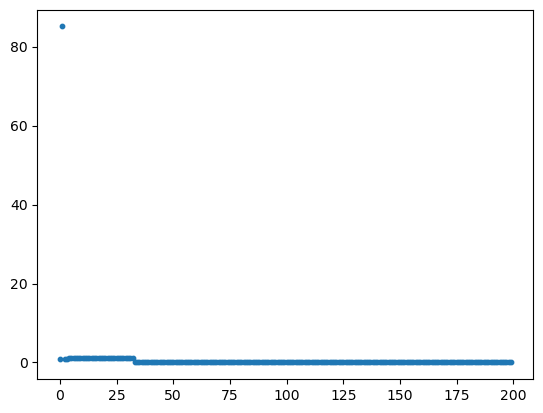

In [34]:
plt.scatter(range(len(solver.lambda_history)), solver.lambda_history, s=10)

### run GKS with DP

In [36]:
solver = GKSClass(projection_dim=3, regparam='dp', dp_stop=False, eta=1.01, delta=la.norm(e), tol=10**(-16))
solver.run(blur_operator, b, D, iter=max_iters, x_true=x_true)

running GKS...:   0%|          | 0/200 [00:00<?, ?it/s]/Users/mirjetapasha/Documents/Research_Projects/TripsPY_May24/multiparameter_package/multiparameter_package/trips/parameter_selection/discrepancy_principle.py:53: RuntimeWarning: divide by zero encountered in true_divide
  beta_new = beta - f/f_prime
/Users/mirjetapasha/Documents/Research_Projects/TripsPY_May24/multiparameter_package/multiparameter_package/trips/parameter_selection/discrepancy_principle.py:56: RuntimeWarning: invalid value encountered in subtract
  if abs(beta_new - beta) < 10**(-7)* beta:
running GKS...:  57%|█████▊    | 115/200 [00:10<00:16,  5.26it/s]/Users/mirjetapasha/Documents/Research_Projects/TripsPY_May24/multiparameter_package/multiparameter_package/trips/parameter_selection/discrepancy_principle.py:53: RuntimeWarning: overflow encountered in true_divide
  beta_new = beta - f/f_prime
running GKS...: 100%|██████████| 200/200 [00:33<00:00,  6.05it/s]


array([[-0.0536457 ],
       [ 0.00637636],
       [ 0.00295631],
       ...,
       [ 0.02768968],
       [-0.07822472],
       [ 0.05988446]])

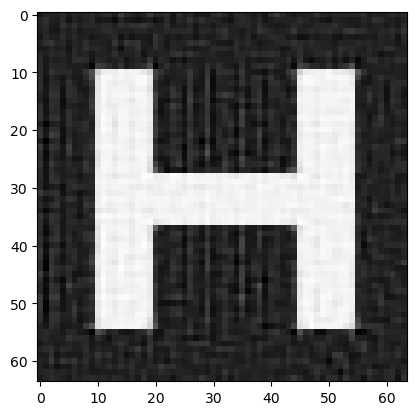

In [37]:
plt.imshow(solver.x.reshape(64,64), cmap='Greys_r')

### convergence

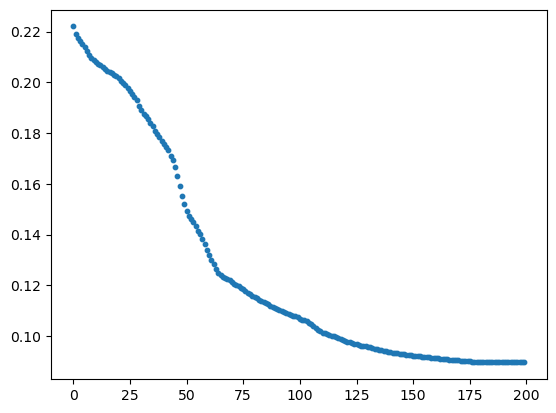

In [38]:
plt.scatter(range(len(solver.rre_history)), solver.rre_history, s=10)

### history of solutions

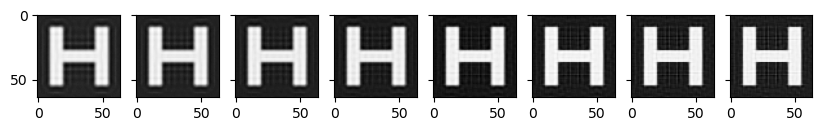

In [39]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(solver.x_history[9+10*ii].reshape(64,64), cmap='Greys_r')

plt.show()

### history of lambda values

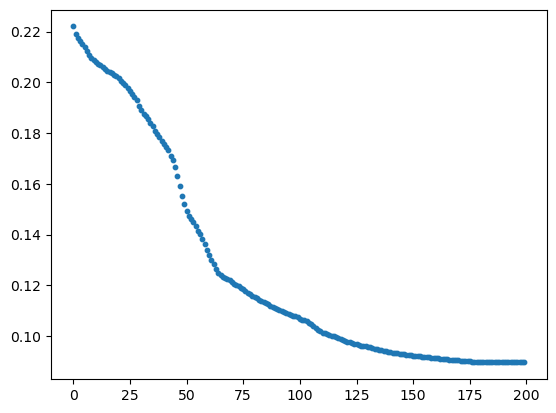

In [40]:
plt.scatter(range(len(solver.rre_history)), solver.rre_history, s=10)

### run GKS with a sequence of parameter values

In [58]:
regvals = [0.01*(0.8**(x)) for x in range(0,max_iters)]

In [59]:
solver = GKSClass(projection_dim=3, regparam=regvals, dp_stop=False, tol=10**(-16))
solver.run(blur_operator, b, D, iter=max_iters, x_true=x_true)

running GKS...: 100%|██████████| 200/200 [00:16<00:00, 11.91it/s]


array([[-0.05288138],
       [ 0.00567146],
       [ 0.00214786],
       ...,
       [ 0.03131412],
       [-0.07852741],
       [ 0.05968425]])

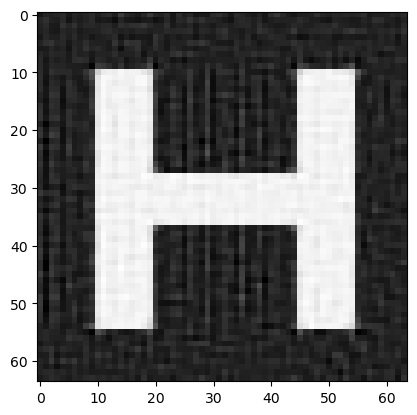

In [60]:
plt.imshow(solver.x.reshape(64,64), cmap='Greys_r')

### convergence

In [61]:
solver.rre_history

[0.2220778855373342,
 0.2191333601973606,
 0.21740886125172962,
 0.21629141729731324,
 0.2153650531241077,
 0.21407178993376072,
 0.2131136482125915,
 0.21189024678477444,
 0.21113264164751316,
 0.21016391857108094,
 0.2091238753611431,
 0.20850160675968318,
 0.20777482864724425,
 0.20688310564689907,
 0.206104062340033,
 0.2055438790163471,
 0.20489874658005272,
 0.2043282320558093,
 0.20376704735737197,
 0.20320343649561548,
 0.20254228040707867,
 0.2017887244577893,
 0.20127558184760394,
 0.2004992828530724,
 0.199532285576796,
 0.19854069413161266,
 0.19769263345925325,
 0.19679987995767295,
 0.1959065323823486,
 0.1946455170152963,
 0.19367398586222476,
 0.19254051581628542,
 0.191675904356708,
 0.1902691692788752,
 0.18836354641387093,
 0.18691122848641448,
 0.184766414225534,
 0.18364169649465176,
 0.18176885821479746,
 0.1801865470547359,
 0.17802146015286477,
 0.17633903299688083,
 0.17520443040600692,
 0.1735585075428392,
 0.1722522883332139,
 0.16989525242963535,
 0.16619532

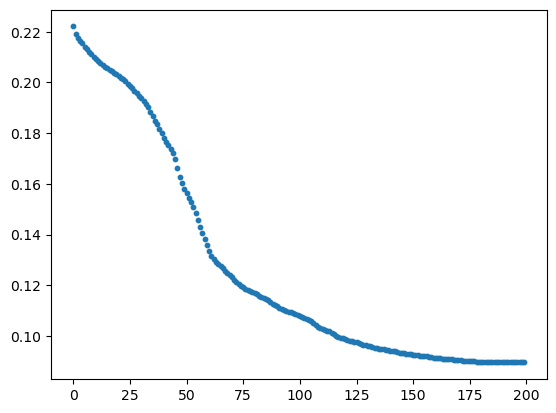

In [62]:
plt.scatter(range(len(solver.rre_history)), solver.rre_history, s=10)

### history of solutions

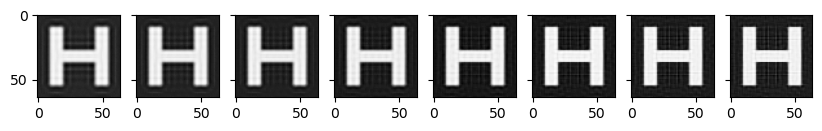

In [63]:
fig, ax = plt.subplots(1, 8, figsize=(10, 10), sharey=True)

for ii in range(8):
    ax[ii].imshow(solver.x_history[9+10*ii].reshape(64,64), cmap='Greys_r')

plt.show()

### history of lambda values

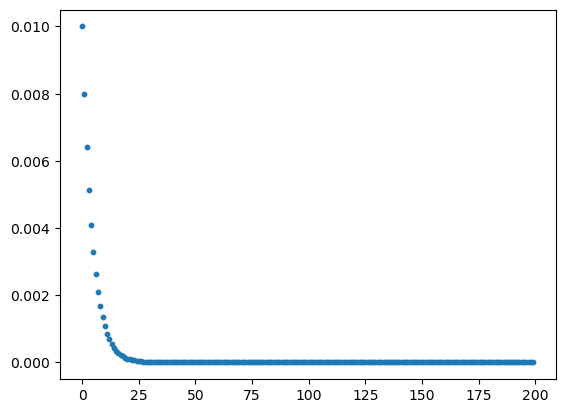

In [64]:
plt.scatter(range(len(solver.lambda_history)), solver.lambda_history, s=10)